In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import  PCA

In [2]:
oli = datasets.fetch_olivetti_faces()

In [3]:
oli

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], dtype=float32),
 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
     

In [4]:
oli.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [5]:
oli['data'].shape

(400, 4096)

In [6]:
oli['images'].shape


(400, 64, 64)

In [7]:
#this comment is for the first line in the next cell
#8 by 8 doesnt mean rows and columns 
#this just specisief the 
#here in each cell that is in total 64(8 into 8) we'll store 64 images 

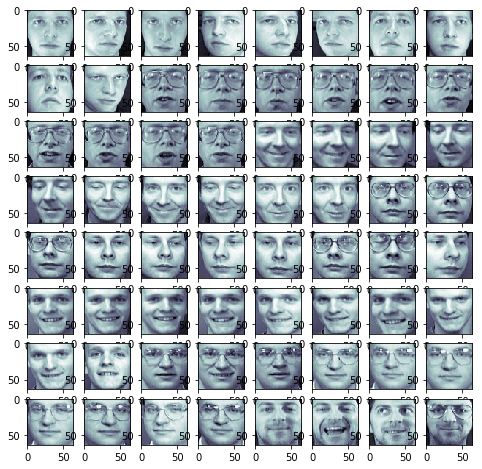

In [8]:

fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    #here 8 8 means rows and columns and i+1 gives the position numbers 
    ax.imshow(oli.images[i],cmap = plt.cm.bone)
plt.show()

In [9]:
x = oli.data
y = oli.target

In [10]:
pca = PCA()
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [11]:
pca.components_.shape

(400, 4096)

In [12]:
k = 0
total = sum(pca.explained_variance_)
current_sum = 0
while current_sum/total < 0.95:
    current_sum += pca.explained_variance_[k]
    k = k +1
k

123

In [13]:
pca = PCA(n_components = k,whiten = True)

In [14]:
transformed_data =  pca.fit_transform(x)

In [15]:
transformed_data.shape

(400, 123)

In [16]:
x_approx = pca.inverse_transform(transformed_data)
x_approx.shape

(400, 4096)

In [17]:
x_approx_images = x_approx.reshape((400,64,64))

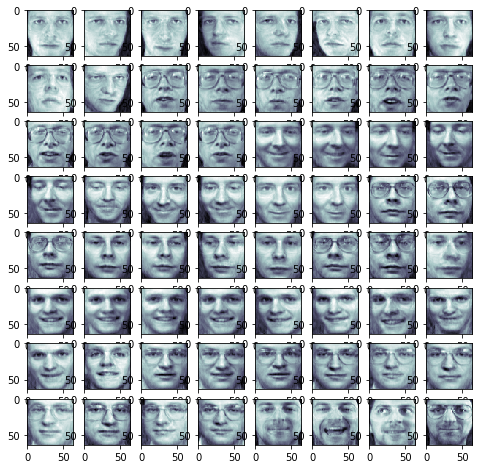

In [18]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    #here 8 8 means rows and columns and i+1 gives the position numbers 
    ax.imshow(x_approx_images[i],cmap = plt.cm.bone)
plt.show()

In [20]:
eigenv = pca.components_
eigenv.shape

(123, 4096)

In [21]:
#reshaping the eigen vectors
eigenfaces = eigenv.reshape(123,64,64)

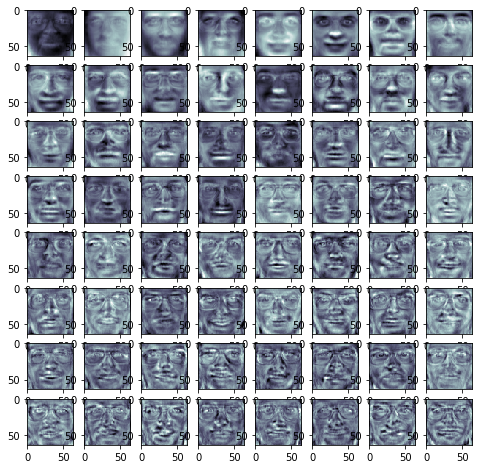

In [22]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    #here 8 8 means rows and columns and i+1 gives the position numbers 
    ax.imshow(eigenfaces[i],cmap = plt.cm.bone)
plt.show()

In [24]:
#eigen faces are called eigen faces because they look like faces
#each new principle component represents features of a face tat we have
#each focuese on different aspect of face